In [1]:
import numpy as np
import pandas 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PETR4.SA', 'ITUB3.SA', 'VALE3.SA', 'WEGE3.SA', 'ABEV3.SA']
new_data = pandas.DataFrame()
for t in tickers:
    new_data[t] = wb.DataReader(t, data_source='yahoo', start='2009-1-1')['Adj Close']

In [3]:
new_data.head()

,PETR4.SA,ITUB3.SA,VALE3.SA,WEGE3.SA,ABEV3.SA
Date,,,,,
2009-01-02,20.355709,6.717523,20.529537,2.488057,1.129752
2009-01-05,20.820219,6.740764,21.646879,2.550158,1.091669
2009-01-06,21.110542,6.856981,22.245941,2.600622,1.078595
2009-01-07,20.281052,6.682652,20.866087,2.484173,1.073900
2009-01-08,21.152016,6.682652,21.794964,2.563742,1.084053


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2658 entries, 2009-01-02 to 2019-11-22
Data columns (total 5 columns):
PETR4.SA    2658 non-null float64
ITUB3.SA    2655 non-null float64
VALE3.SA    2656 non-null float64
WEGE3.SA    2656 non-null float64
ABEV3.SA    2654 non-null float64
dtypes: float64(5)
memory usage: 124.6 KB


In [5]:
new_data.iloc[0]

PETR4.SA    20.355709
ITUB3.SA     6.717523
VALE3.SA    20.529537
WEGE3.SA     2.488057
ABEV3.SA     1.129752
Name: 2009-01-02 00:00:00, dtype: float64

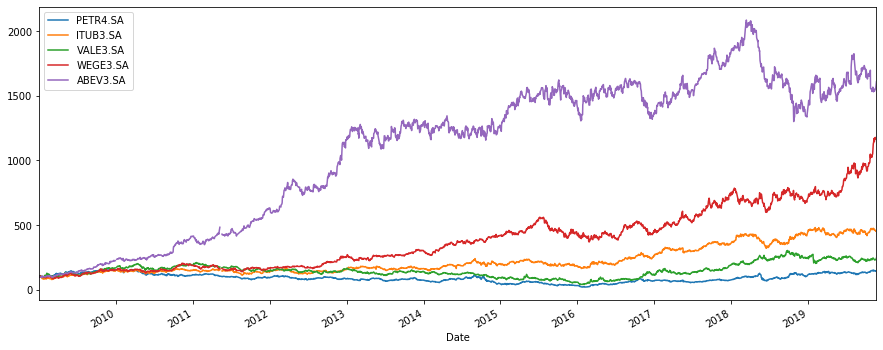

In [6]:
(new_data /new_data.iloc[0] * 100).plot(figsize=(15,6))

In [8]:
new_data.iloc[0]

PETR4.SA    20.355709
ITUB3.SA     6.717523
VALE3.SA    20.529537
WEGE3.SA     2.488057
ABEV3.SA     1.129752
Name: 2009-01-02 00:00:00, dtype: float64

In [16]:
new_data.loc['2019-11-22']

PETR4.SA    29.980000
ITUB3.SA    30.730000
VALE3.SA    50.029999
WEGE3.SA    29.059999
ABEV3.SA    18.190001
Name: 2019-11-22 00:00:00, dtype: float64

In [17]:
#Taxa de Retorno Simples

In [18]:
returns = (new_data / new_data.shift(1)) -1

In [19]:
returns.head()

,PETR4.SA,ITUB3.SA,VALE3.SA,WEGE3.SA,ABEV3.SA
Date,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.022820,0.003460,0.054426,0.024960,-0.033709
2009-01-06,0.013944,0.017241,0.027674,0.019789,-0.011976
2009-01-07,-0.039293,-0.025424,-0.062027,-0.044778,-0.004353
2009-01-08,0.042945,0.000000,0.044516,0.032031,0.009455


In [23]:
weights = np.array([0.20,0.20,0.20,0.20,0.20])

In [24]:
np.dot(returns, weights)

array([        nan,  0.01439126,  0.0133345 , ..., -0.00245118,
        0.01384567,  0.00990082])

In [26]:
annual_returns = returns.mean() * 250
annual_returns

PETR4.SA    0.131207
ITUB3.SA    0.186563
VALE3.SA    0.170197
WEGE3.SA    0.270314
ABEV3.SA    0.300930
dtype: float64

In [27]:
np.dot(annual_returns, weights)

0.21184209349638425

In [28]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'

In [30]:
print (pfolio_1)

21.184%


In [34]:
weight_2 = np.array([0.5, 0.3, 0.05, 0.1, 0.05])

In [36]:
pfolio_2 = str(round(np.dot(annual_returns, weight_2), 5) * 100) + '%'

In [37]:
print (pfolio_1)
print (pfolio_2)

21.184%
17.216%
